Published on June 30, 2025. By Prata, Marília (mpwolke)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#Two lines Required to Plot Plotly
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAY9ennureLr2K4kK5EhsfjnWI9HaTuN1lbQ&s)

## We're all ambiverts! 

By Thomas Chapman - Jun 4, 2024.

"The likelihood any individual is a **pure extrovert or introvert is, like, less than 0.1%**!"

"Some people are very extroverted, some are very introverted, and most others clump somewhere in the middle. In the sciences, we call this **a normal distribution**."

"When you get a result back from an assessment and it says you are an introvert or an extrovert, it is **a tendency, not a fact**. Extroverts still need time to themselves, and introverts still have very close friendships and people they want to spend time with—that is the definition of an ambivert. So yeah, of course **you are an ambivert—we all are!**"

"However, here is the real danger with the simple introvert/extrovert label - it has been overgeneralized. People hear extrovert and they assume a person who needs to be the center of attention and to always be talking. They are also assumed to be flakey, inconsistent, and to not care about others. On the flip side, we hear introvert and immediately think shy and, if we are being completely honest, weak. Introverts are assumed to not be able to stand up for themselves and to be doormats. We all know this is not true."

"Instead of thinking of introversion/extroversion as outward displays of behavior, like the earlier assumptions, let's think of them as a direction of energy. People with introverted personalities tend to direct their energy inward toward themselves and their experiences, while extroverts tend to direct their energy outward to the experiences of other people."

### Depends on what you are doing/what part of your brain you are using at that moment." 

"You are and will always be an ambivert. **Sometimes, you will be introverted**, and **other times**, you will be **extroverted**. It depends on what you are doing and what part of your brain you are using at that moment."

https://www.tpdcoach.com/post/but-i-m-an-ambivert-clearing-up-the-introvert-extrovert-confusion

#Predict which Cockatoo is the Extroverted which is the Introverted:

![](https://i.gifer.com/4nq9.gif)Gifer

## Competition Citation

@misc{playground-series-s5e7,

    author = {Walter Reade and Elizabeth Park},
    
    title = {Predict the Introverts from the Extroverts},
    
    year = {2025},
    
    howpublished = {\url{https://kaggle.com/competitions/playground-series-s5e7}},
    note = {Kaggle}
}

## Load the csv files

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s5e7/sample_submission.csv')

## Leadership Personalities

**Citation**:

@article{article,
author = {Hudson, Swinton and Ferguson, Geremy},
year = {2016},
month = {09},
pages = {},
title = {Leadership Personalities: Extrovert, Introvert or Ambivert?},
journal = {International Journal Of Management And Economics Invention},
doi = {10.18535/ijmei/v2i9.12}
}

### Leadership Personalities: Extrovert, Introvert or Ambivert?

"Recent literature is introducing the idea that people are **rarely  solely  introverted  or  extroverted**  as  defined  by  Jung. Instead, the concept  of the  ambivert is  beginning to  come more widely  discussed. Vipul  B. Patel,  in the  article Five Factor  Personality  Model  of  Leadership,  described  the ambivert as  a  person  who  can,  “Move easily from working with others to working  alone, have  moderate threshold for sensory stimulation, and may tire of it after a while”."

“In  between  these  two  extremes [extrovert and introvert] are the Ambiverts, who are able to move comfortably  from  outgoing  social  situations  to  the isolation of working alone. The stereotypical ambivert is the Player-Coach,  who  moves  upon  demand  from  leadership demands of  Coach to  the personal  production  demands  of the  Player”.  Thus, the ambivert oriented individual can act as a chameleon adjusting to the make-up of the team as needed."

"When a team is made primarily of introverts, the ambivert  can  utilize  the  extroverted portions  of their  personality in an attempt to, dissuade the team from lapsing into a team that is heavy on complementation and absent of conversation." 

"Conversely,  when  leading  a  team  of  extroverts,  the ambivert can comfortably shift into a more introverted role allowing the team to innovate and then execute those ideas by  quieting  the  outgoing,  extroverted  traits  for  the  more contemplative  introverted  traits.  Understanding  the  non-binary reality of the Jungian personality model is important as it **is rare to find individuals that are solely on either side of the model.** As Grant (2012) infers there is **no such thing as a pure introvert or extrovert**. The fluidity of the ambivert provides the team with the leader they need at that very moment who can adjust the mix of their introvert and extrovert personality over time as needed."

https://www.researchgate.net/publication/308599317_Leadership_Personalities_Extrovert_Introvert_or_Ambivert

In [4]:
df.tail()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert
18523,18523,1.0,No,8.0,6.0,No,4.0,7.0,Extrovert


## info() method

We have missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


### Checking Dataset

In [6]:
# checking dataset

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  18524
Columns  :  9

Features : 
 ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']

Missing values :   9196

Unique values :  
 id                           18524
Time_spent_Alone                12
Stage_fear                       2
Social_event_attendance         11
Going_outside                    8
Drained_after_socializing        2
Friends_circle_size             16
Post_frequency                  11
Personality                      2
dtype: int64


### Codes by Lokesh (vote his work)

https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

## Handling Missing values

In [7]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

cols=df.columns
num_cols=[x for x in df.columns if df[x].dtypes!='O']
cat_cols=[y for y in cols if y not in num_cols]

In [8]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

for col in num_cols:
    x=df[df.Personality=='Extrovert'][col].mean()
    df.loc[df.Personality == 'Extrovert', col] = df.loc[df.Personality == 'Extrovert', col].fillna(x)
    y=df[df.Personality=='Introvert'][col].mean()
    df.loc[df.Personality == 'Introvert', col] = df.loc[df.Personality == 'Introvert', col].fillna(y)

In [10]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

for col in cat_cols:
    x=df[df.Personality=='Extrovert'][col].mode()[0]
    df.loc[df.Personality == 'Extrovert', col] = df.loc[df.Personality == 'Extrovert', col].fillna(x)
    y=df[df.Personality=='Introvert'][col].mode()[0]
    df.loc[df.Personality == 'Introvert', col] = df.loc[df.Personality == 'Introvert', col].fillna(y)

## Done, no missing (on train)

In [11]:
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## Let's visualize our Personalities 

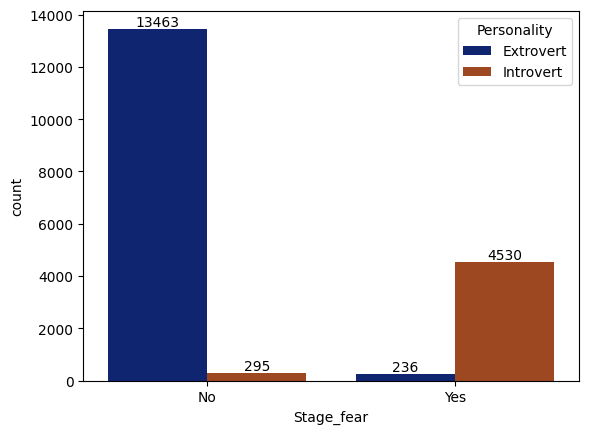

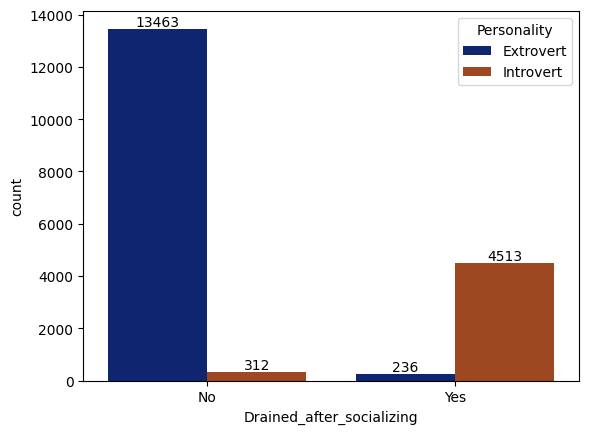

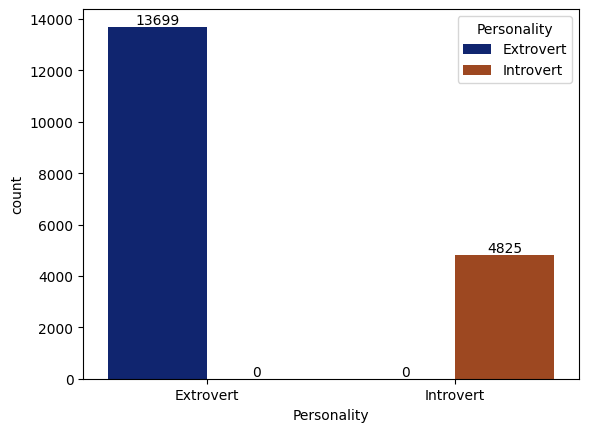

In [15]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

for col in cat_cols:
    ax=sns.countplot(x=col,data=df,hue='Personality',palette='dark')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

## I would add "Time spent on Kaggle" on the Distributions below.

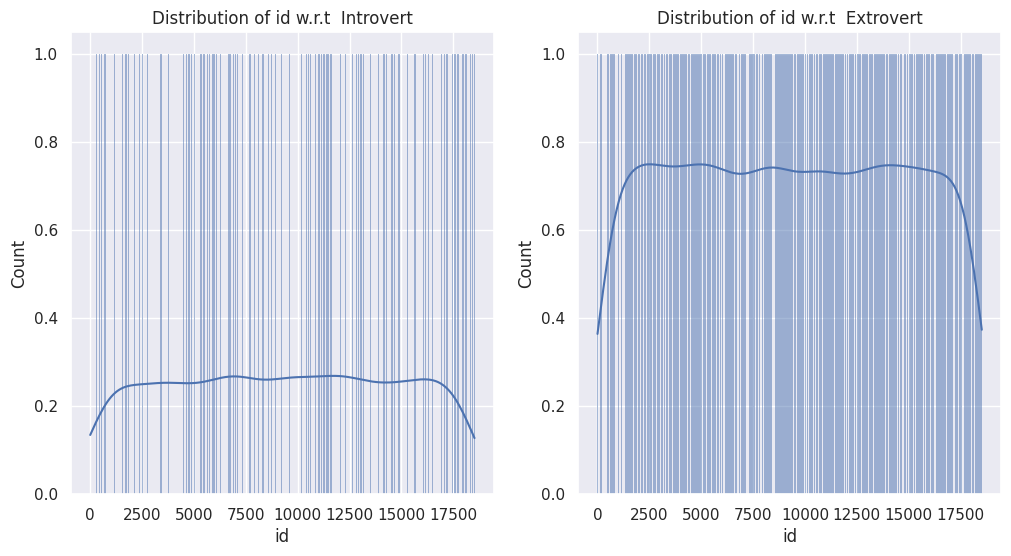

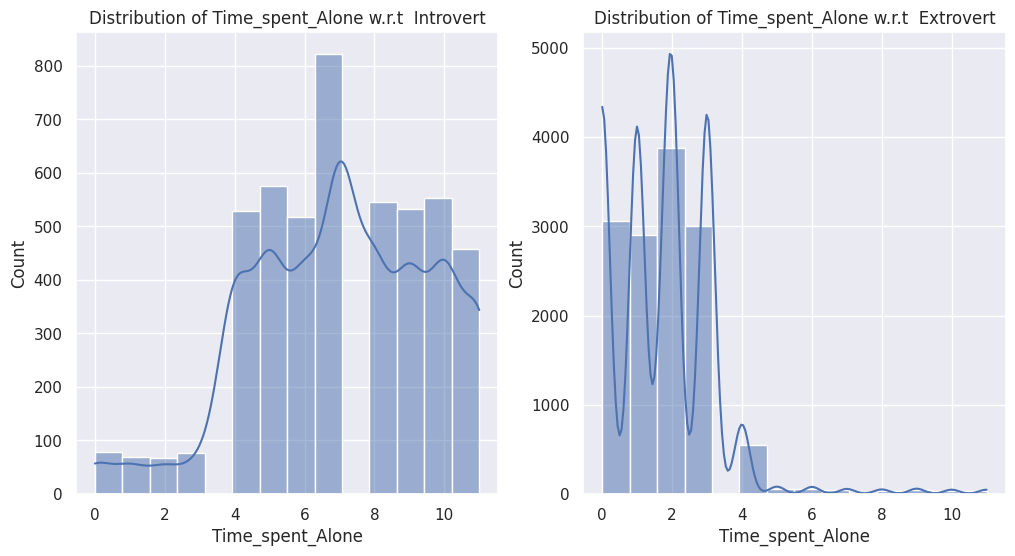

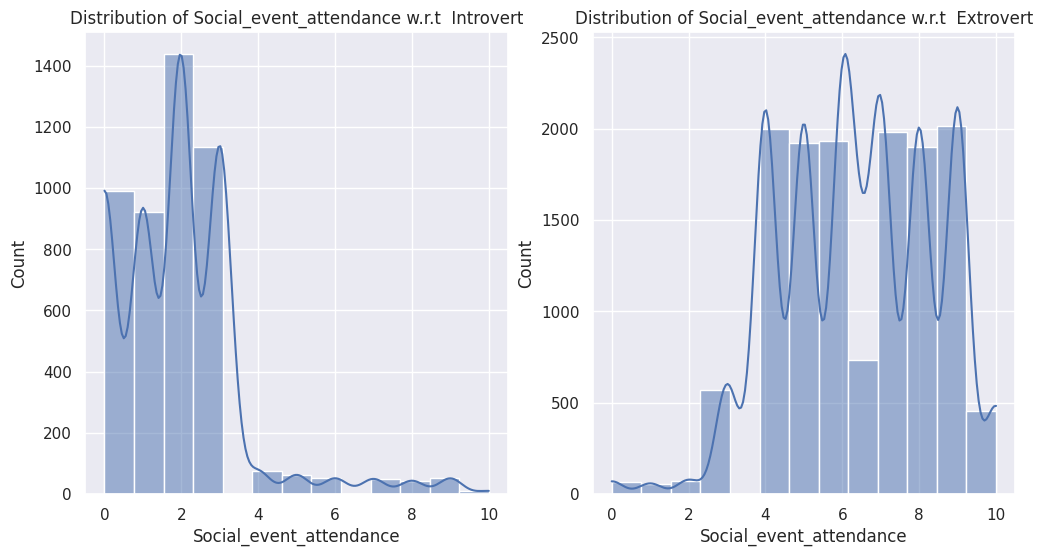

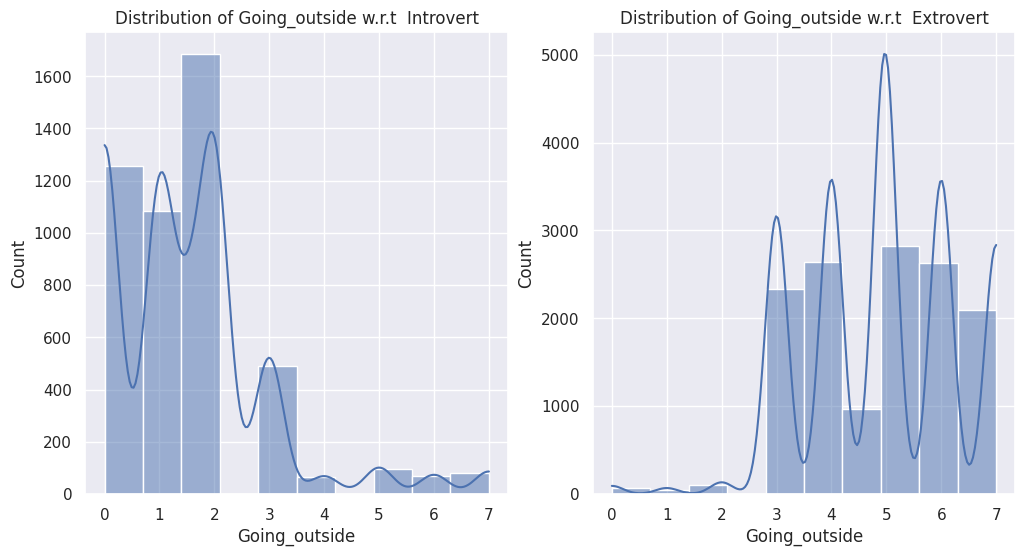

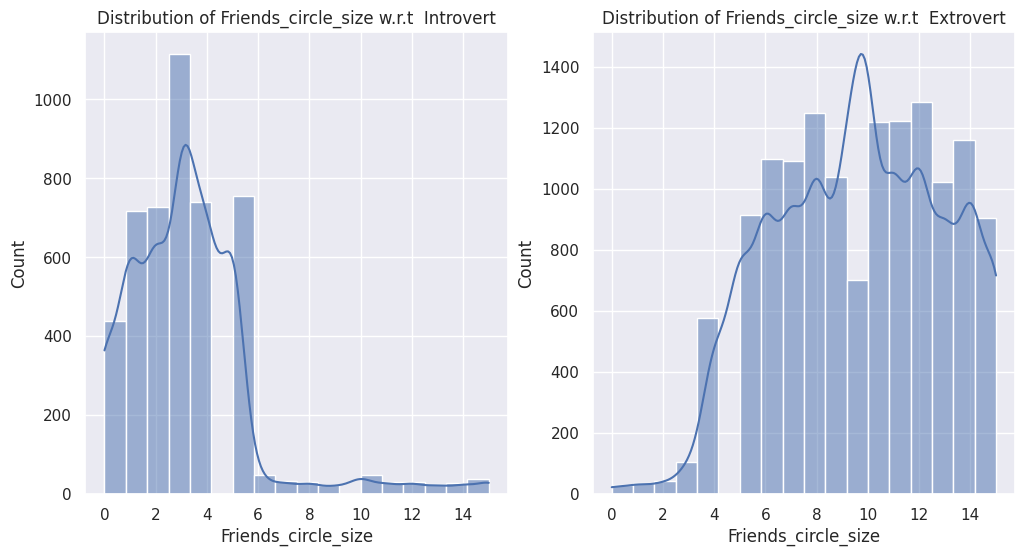

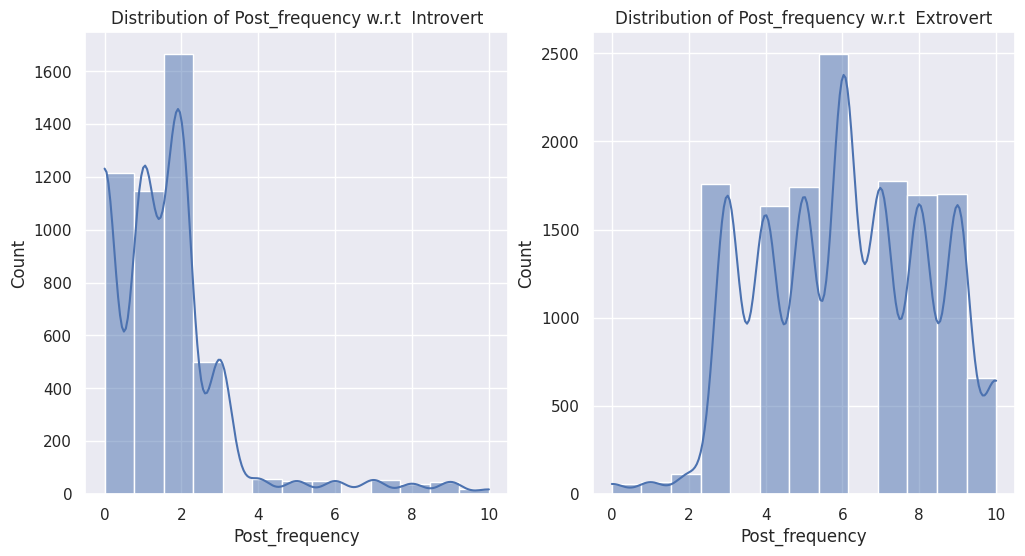

In [17]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

sns.set(style="darkgrid")
for col in num_cols:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(x=col,kde=True,data=df[df.Personality=="Introvert"],bins=df[col].nunique())
    plt.title(f'Distribution of {col} w.r.t  Introvert')
    plt.subplot(1,2,2)
    sns.histplot(x=col,kde=True,data=df[df.Personality=="Extrovert"],bins=df[col].nunique())
    plt.title(f'Distribution of {col} w.r.t  Extrovert')
    plt.show()

## Heatmap

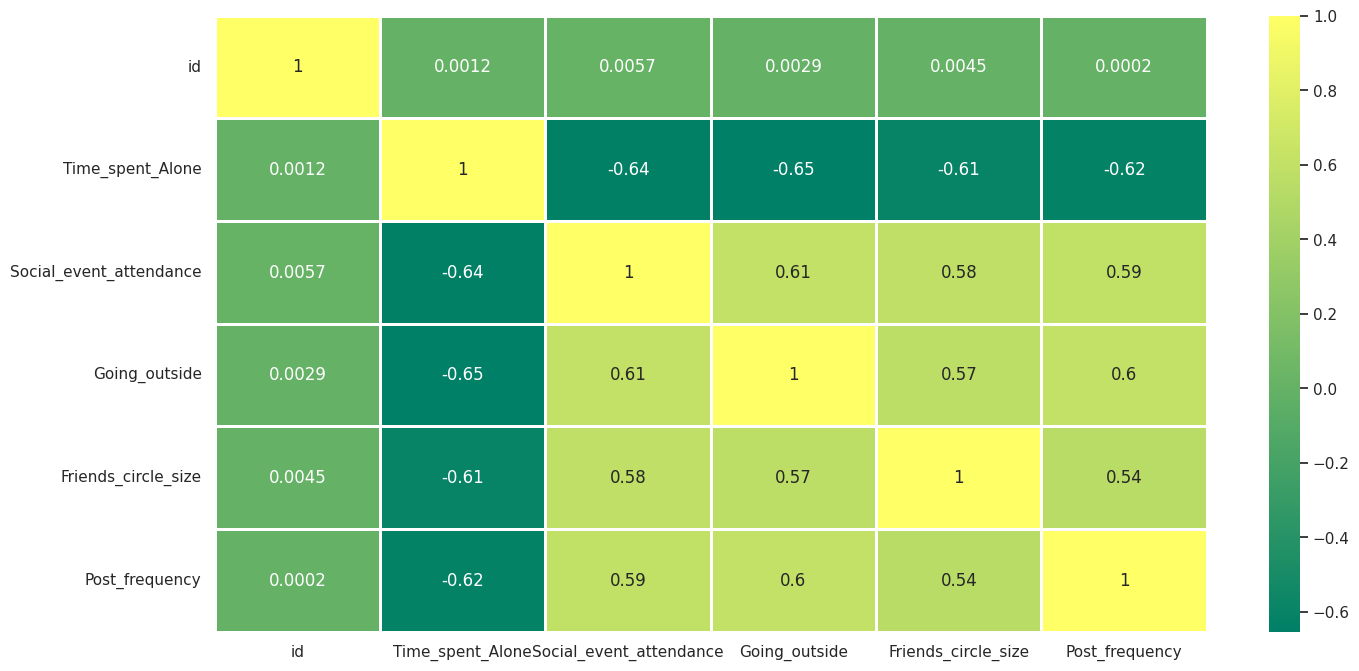

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),cmap='summer',annot=True,linewidths=0.75)
plt.show()

## Encoding

In [19]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

stage_fear_map={'Yes':1,'No':0}
df['Stage_fear']=df['Stage_fear'].map(stage_fear_map)
soc_map={'Yes':1,'No':0}
df['Drained_after_socializing']=df['Drained_after_socializing'].map(soc_map)
personality_map={'Introvert':1,'Extrovert':0}
df['Personality']=df['Personality'].map(personality_map)

## I didn't get that  "-" * 20 }\n  Though I'm feeling drained after it : )

In [20]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

for col in cols:
    print(df[col].value_counts())
    print(f'\n{ "-" * 20 }\n')

id
0        1
12302    1
12354    1
12353    1
12352    1
        ..
6173     1
6172     1
6171     1
6170     1
18523    1
Name: count, Length: 18524, dtype: int64

--------------------

Time_spent_Alone
0.000000     3139
3.000000     3081
2.000000     3039
1.000000     2973
4.000000     1079
1.747146      909
5.000000      633
10.000000     587
8.000000      582
7.000000      581
6.000000      574
9.000000      574
11.000000     492
7.051937      281
Name: count, dtype: int64

--------------------

Stage_fear
0    13758
1     4766
Name: count, dtype: int64

--------------------

Social_event_attendance
4.000000     2073
9.000000     2063
7.000000     2031
5.000000     1985
6.000000     1984
8.000000     1945
3.000000     1703
2.000000     1063
0.000000     1055
1.000000      978
6.389450      732
10.000000     464
1.934202      448
Name: count, dtype: int64

--------------------

Going_outside
5.000000    2923
3.000000    2822
4.000000    2703
6.000000    2702
7.000000    2170
0.0000

## Remove these float values

NaN values of Numerical Columns were replaced with mean, there are float values in our dataset, let's remove them.

In [21]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

for col in num_cols:
    df[col]=df[col].astype(int)

## Import Libraries

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

X=df.drop('Personality',axis=1)
y=df.Personality

## Split data (train-test-split)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [25]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

model=LogisticRegression()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9692286928942574

In [26]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

y_test_pred=model.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9681511470985156

### Confusion Matrix

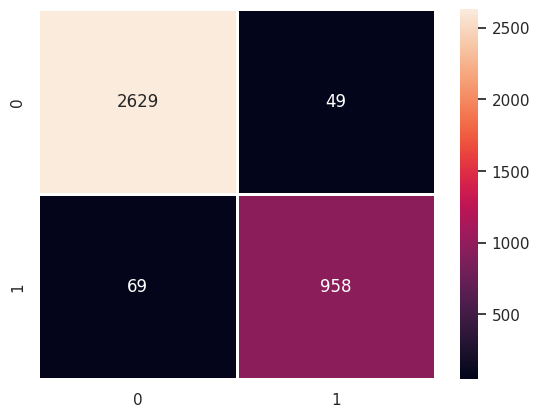

In [27]:
#By Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,linewidth=0.75,fmt='d')
plt.show()

In [28]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2678
           1       0.95      0.93      0.94      1027

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



![](https://i.redd.it/1fap3y0ev86b1.jpg)Reddit

#Acknowledgements:

Lokesh https://www.kaggle.com/code/lokeshbabukolamala/predicting-human-personality-94-acc-with-eda/notebook